# Combining ensemble predictions

In this experiment we will try to combine models' predictions by using a RandomForest and LogisticRegression, both implemented in scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_100 = pd.read_csv("preds_100.csv")
df_100

,labels,resnet_small_0,resnet_small_1,resnet_small_2,resnet_small_3,resnet_small_4,resnet_small_5
0,0,0.053425,0.054599,0.048366,0.046307,0.052097,0.047063
1,0,0.057921,0.049336,0.055994,0.054162,0.056478,0.051250
2,0,0.070490,0.052635,0.054429,0.069350,0.072273,0.061029
3,0,0.052108,0.050118,0.052836,0.047540,0.048756,0.048249
4,0,0.068706,0.086846,0.078086,0.061588,0.086300,0.071561
...,...,...,...,...,...,...,...
100995,0,0.096703,0.102163,0.072412,0.102304,0.075896,0.082018
100996,0,0.055103,0.051565,0.049049,0.045933,0.054050,0.048064
100997,0,0.057398,0.050548,0.048314,0.050269,0.052075,0.053577
100998,0,0.053418,0.052081,0.046642,0.051192,0.053075,0.051880


In [ ]:
df_eval = pd.concat([
  df_100[df_100['labels'] == 0].sample(frac=0.2),
  df_100[df_100['labels'] == 1].sample(frac=0.2)
])

df_train = df_100.drop(df_eval.index)

print(df_eval['labels'].value_counts())
print(df_train['labels'].value_counts())

0    20000
1      200
Name: labels, dtype: int64
0    80000
1      800
Name: labels, dtype: int64


In [ ]:
df_train[[f"resnet_small_{i}" for i in range(6)]]

,resnet_small_0,resnet_small_1,resnet_small_2,resnet_small_3,resnet_small_4,resnet_small_5
0,0.053425,0.054599,0.048366,0.046307,0.052097,0.047063
1,0.057921,0.049336,0.055994,0.054162,0.056478,0.051250
2,0.070490,0.052635,0.054429,0.069350,0.072273,0.061029
3,0.052108,0.050118,0.052836,0.047540,0.048756,0.048249
4,0.068706,0.086846,0.078086,0.061588,0.086300,0.071561
...,...,...,...,...,...,...
100994,0.063638,0.049874,0.053227,0.075664,0.054006,0.066138
100996,0.055103,0.051565,0.049049,0.045933,0.054050,0.048064
100997,0.057398,0.050548,0.048314,0.050269,0.052075,0.053577
100998,0.053418,0.052081,0.046642,0.051192,0.053075,0.051880


In [ ]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay, precision_score, recall_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(df_train[[f"resnet_small_{i}" for i in range(6)]], df_train['labels'])

preds = clf.predict(df_eval[[f"resnet_small_{i}" for i in range(6)]])

print(precision_score(df_eval['labels'], preds))
print(recall_score(df_eval['labels'], preds))

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
df_train[[f"resnet_small_{i}" for i in range(6)]].to_numpy().shape

(80800, 6)

In [ ]:
df_train['labels'].to_numpy().shape

(80800,)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(df_train[[f"resnet_small_{i}" for i in range(6)]].to_numpy(), df_train['labels'].to_numpy())

LogisticRegression()

In [ ]:
preds = clf.predict_proba(df_eval[[f"resnet_small_{i}" for i in range(6)]].to_numpy())

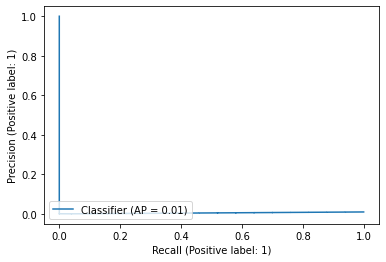

In [ ]:
PrecisionRecallDisplay.from_predictions(df_eval['labels'].to_numpy(), preds[:,0])
plt.show()